Chap 4 Exercises

In [1]:
# importing libraries
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize)
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
(LinearDiscriminantAnalysis as LDA,
QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
print('done')

done


13

A

In [2]:
Weekly = load_data("Weekly")
Weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


In [3]:
Weekly.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [4]:
filler = Weekly[['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today']]
filler.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


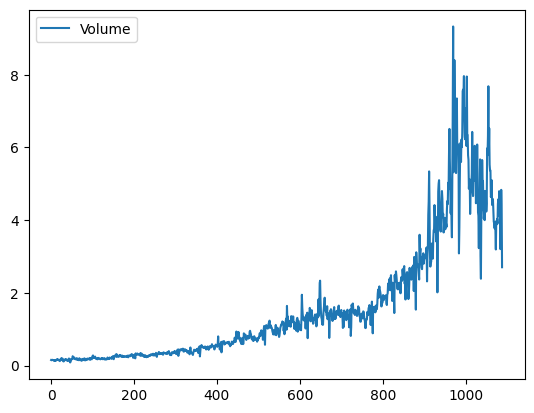

In [5]:
Weekly.plot(y='Volume');

There does not appear to be strong correlations amongst the predictors, except that volume goes up with year, which makes sense.

B

In [6]:
vars = Weekly.columns.drop(['Today','Direction','Year'])
design = MS(vars)
X = design.fit_transform(Weekly)
Y = Weekly.Direction == 'Up'
glm = sm.GLM(Y,X, family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,0.2669,0.086,3.106,0.002
Lag1,-0.0413,0.026,-1.563,0.118
Lag2,0.0584,0.027,2.175,0.030
Lag3,-0.0161,0.027,-0.602,0.547
Lag4,-0.0278,0.026,-1.050,0.294
Lag5,-0.0145,0.026,-0.549,0.583
Volume,-0.0227,0.037,-0.616,0.538


Based on the logistic regression, none of the predictors appear to be statistically significant

C

In [7]:
probs = results.predict()
labels = np.array(['Down']*1089)
labels[probs >0.50] = 'Up'


confusion_table(labels, Weekly.Direction)

Truth,Down,Up
Predicted,,
Down,54,48
Up,430,557


In [8]:
(54 + 557) / 1089

0.5610651974288338

There was a 56% accuracy in this logistic regression model. Out of the errors, most were from predicting UP when the reality was down.

D

In [9]:
train = (Weekly.Year < 2009)
Weekly_train = Weekly.loc[train]
Weekly_test = Weekly.loc[~train]
Weekly_test.shape

(104, 9)

In [10]:
#setting lag2 as the only predictor
X_new = Weekly.Lag2

In [11]:
X_train, X_test = X_new.loc[train], X_new.loc[~train]
Y_train, Y_test = Y.loc[train], Y.loc[~train]
glm_train = sm.GLM(Y_train,X_train, family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)


D = Weekly.Direction
L_train, L_test = D.loc[train], D.loc[~train]

labels = np.array(['Down']*104)
labels[probs >0.5] = 'Up'
confusion_table(labels, L_test)


Truth,Down,Up
Predicted,,
Down,20,24
Up,23,37


In [12]:
np.mean(labels == L_test), np.mean(labels != L_test)

(0.5480769230769231, 0.4519230769230769)

This model with only lag2 as a predictor correctly labeled the direction in the test case approximately 55% of the time.

E

In [13]:
lda = LDA(store_covariance= True)

# include all of the parameters this time, as the logistic model performed marginally better with all of them.
X_train, X_test = X.loc[train], X.loc[~train]

lda.fit(X_train, L_train)


lda_predict = lda.predict(X_test)

confusion_table(lda_predict, L_test)

Truth,Down,Up
Predicted,,
Down,31,44
Up,12,17


In [14]:
np.mean(lda_predict == L_test), np.mean(lda_predict != L_test)

(0.46153846153846156, 0.5384615384615384)

Linear Discriminant Analysis correctly labeled 46 % percent of the time, noticeably less than logistic regression with multiple or even a single parameter

F

In [15]:
qda = QDA(store_covariance= True)
qda.fit(X_train, L_train)

qda_pred = qda.predict(X_test)

confusion_table(qda_pred, L_test)

C:\Users\Navid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Navid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\discriminant_analysis.py:960: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\Navid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\discriminant_analysis.py:960: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\Navid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\discriminant_analysis.py:963: RuntimeWarning: divide by zero e

Truth,Down,Up
Predicted,,
Down,43,61
Up,0,0


In [16]:
np.mean(qda_pred == L_test), np.mean(qda_pred != L_test)

(0.41346153846153844, 0.5865384615384616)

The Quadratic Discrimant Analysis predicted very poorly, with only a 41% accuracy.

G

In [17]:
# all of the parameters are obviously on the same scale, so no need to normalize for the knn classifier for this particular data set

knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, L_train)
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred, L_test)

Truth,Down,Up
Predicted,,
Down,21,32
Up,22,29


In [18]:
np.mean(knn1_pred == L_test), np.mean(knn1_pred != L_test)

(0.4807692307692308, 0.5192307692307693)

The Nearest Neighbor Classifier with K = 1 outperformed both the linear and quadratic discriminant models, with a repectable 48% accuracy rate, but was still outperformed by the logistic regression.

H

In [19]:
nb = GaussianNB()
nb.fit(X_train,L_train)
nb_pred = nb.predict(X_test)
confusion_table(nb_pred, L_test)

Truth,Down,Up
Predicted,,
Down,42,56
Up,1,5


In [20]:
np.mean(nb_pred == L_test), np.mean(nb_pred != L_test)

(0.4519230769230769, 0.5480769230769231)

The Naive Bayes model also performed below par, with just 45 percent accuracy rate, outperforming only the Quadratic Discriminant model

I. The logistic regressions provided the best results with this data

14

In [21]:
#clean data

Auto = pd.read_csv("Auto.csv", index_col= "name", na_values=["?"])
Auto_new = Auto.dropna()
Auto = Auto_new

In [22]:
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1
vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1


In [23]:
Auto.shape

(392, 8)

A

In [24]:
Auto['mpg'].median()

22.75

In [25]:
Auto['mpg01'] = Auto['mpg']
Auto['mpg01'][Auto['mpg'] > 22.75] = 1
Auto['mpg01'][Auto['mpg'] < 22.75] = 0

C:\Users\Navid\AppData\Local\Temp\ipykernel_2568\1943473382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Auto['mpg01'][Auto['mpg'] > 22.75] = 1
C:\Users\Navid\AppData\Local\Temp\ipykernel_2568\1943473382.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Auto['mpg01'][Auto['mpg'] < 22.75] = 0


In [26]:
Auto['mpg01']

name
chevrolet chevelle malibu    0.0
buick skylark 320            0.0
plymouth satellite           0.0
amc rebel sst                0.0
ford torino                  0.0
                            ... 
ford mustang gl              1.0
vw pickup                    1.0
dodge rampage                1.0
ford ranger                  1.0
chevy s-10                   1.0
Name: mpg01, Length: 392, dtype: float64

In [27]:
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
name,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,0.0
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,0.0
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,0.0
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,0.0
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,0.0
...,...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1,1.0
vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2,1.0
dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1,1.0


B

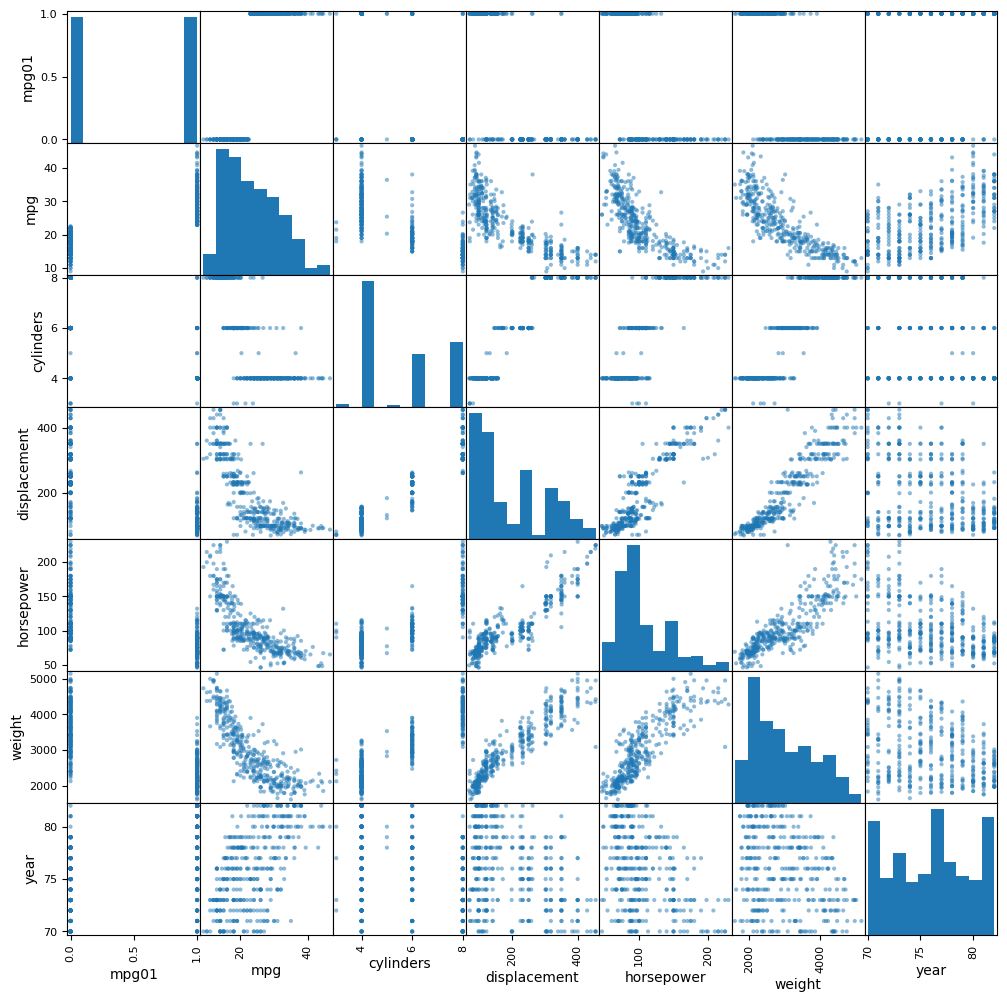

In [28]:
pd.plotting.scatter_matrix(Auto[['mpg01','mpg','cylinders','displacement','horsepower','weight','year']], figsize= (12,12));

Besides the obvious association with the mpg feature, higher values of displacement, weight, and horsepower seem to be associated with a negative response of mpg01, which is very logical if you think of the implications of these parameters for fuel/engine efficiency

C

In [29]:
(X_train, X_test, y_train, y_test) = train_test_split(Auto, Auto['mpg01'], test_size=100, random_state=0)

D

In [30]:
lda = LDA(store_covariance= True)

lda.fit(X_train, y_train)

lda_pred = lda.predict(X_test)

confusion_table(lda_pred, y_test)

Truth,0.0,1.0
Predicted,,
0.0,40,3
1.0,8,49


In [31]:
np.mean( lda_pred == y_test), np.mean(lda_pred != y_test)

(0.89, 0.11)

The test error rate of the linear discriminant analysis is 11 %

E

In [32]:
qda = QDA(store_covariance= True)
qda.fit(X_train, y_train)

qda_prediction = qda.predict(X_test)

confusion_table(qda_prediction, y_test)

C:\Users\Navid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Navid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\discriminant_analysis.py:960: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\Navid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\discriminant_analysis.py:960: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\Navid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\discriminant_analysis.py:963: RuntimeWarning: divide by zero e

Truth,0.0,1.0
Predicted,,
0.0,48,52
1.0,0,0


In [33]:
np.mean(qda_prediction == y_test), np.mean(qda_prediction != y_test)

(0.48, 0.52)

The test error rate of the quadratic discriminant analysis is much worse than the linear model, standing at 52%

F

In [34]:
vars = Auto.columns.drop(['mpg01',])
design = MS(vars)
X = design.fit_transform(Auto)
glm_train = sm.GLM(y_train, X_train, family= sm.families.Binomial())
results = glm_train.fit()
preds = results.predict(X_test)


label = np.array([0]*100)
label[preds > 0.5] = 1

confusion_table(label, y_test)


C:\Users\Navid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\Navid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\Navid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warning

Truth,0.0,1.0
Predicted,,
0.0,48,0
1.0,0,52


In [35]:
np.mean(label == y_test), np.mean(label != y_test)

(1.0, 0.0)

The logistic regression model performed with perfect accuracy, presumably because it identified that when mpg was over the median this determined our response variable, which is what we defined it to be at the start (cmon trevor and rob, you gotta write better exercises than this ;)  )

G

In [36]:
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_pred = nb.predict(X_test)

confusion_table(nb_pred, y_test)

Truth,0.0,1.0
Predicted,,
0.0,48,0
1.0,0,52


The Naive Bayes model also achieved perfect separation

H

In [37]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train,y_train)
knn1_pred = knn1.predict(X_test)

confusion_table(knn1_pred, y_test)

Truth,0.0,1.0
Predicted,,
0.0,40,7
1.0,8,45


In [38]:
np.mean(knn1_pred == y_test), np.mean(knn1_pred != y_test)

(0.85, 0.15)

The K neighbors classifier with K = 1 put up a solid result of a 15% test error rate

In [39]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train,y_train)
knn3_pred = knn3.predict(X_test)

confusion_table(knn3_pred, y_test)

Truth,0.0,1.0
Predicted,,
0.0,41,6
1.0,7,46


In [40]:
np.mean(knn3_pred == y_test), np.mean(knn3_pred != y_test)

(0.87, 0.13)

With K = 3, the classifier improved to a 13% error rate

In [41]:
knn9 = KNeighborsClassifier(n_neighbors=9)
knn9.fit(X_train,y_train)
knn9_pred = knn9.predict(X_test)

confusion_table(knn9_pred, y_test)

Truth,0.0,1.0
Predicted,,
0.0,36,7
1.0,12,45


In [42]:
np.mean(knn9_pred == y_test), np.mean(knn9_pred != y_test)

(0.81, 0.19)

With K = 9, the classifier's performance fell to a 19% error rate

Of the values of K tested here, the best performing model had K = 3, indicating that at K= 1 the model suffered from high variance and at K = 9 it suffered from high bias

15

A

In [47]:
def Power():
    print( 2**3 )

In [48]:
Power()

8


B

In [56]:
def power2(X, A):
    print( X**A )
    return None

In [57]:
power2(3,8)

6561


C

In [58]:
power2(8,17), power2(131, 3)

2251799813685248
2248091


(None, None)

D

In [ ]:
def power3(X,A):
    return X**A

The rest of exercise 15 is basic plotting and trivial, so I will not cover it.

16

In [59]:
Boston = load_data('Boston')
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [60]:
Boston.shape

(506, 13)

In [61]:
Boston.crim.median()

0.25651

In [62]:
Boston['crim01'] = Boston['crim']
Boston['crim01'][Boston['crim'] > 0.25651] = 1
Boston['crim01'][Boston['crim'] < 0.25651] = 0

C:\Users\Navid\AppData\Local\Temp\ipykernel_2568\2922328513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Boston['crim01'][Boston['crim'] > 0.25651] = 1
C:\Users\Navid\AppData\Local\Temp\ipykernel_2568\2922328513.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Boston['crim01'][Boston['crim'] < 0.25651] = 0


In [63]:
Boston['crim01']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Name: crim01, Length: 506, dtype: float64

Rest of the exercise follows the pattern of exercise 14, and is trivial